## Installing required libraries

In [8]:
!pip install nltk
!pip install tensorflow

## Importing required Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Loading the dataset
data = pd.read_csv("roberta_sentiment_processed.csv", on_bad_lines='skip')

data.head()


,Unnamed: 0,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,roberta_sentiment
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,neutral
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,neutral
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,negative
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,positive
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,positive


In [11]:
data.shape

(213706, 11)

## Text Preprocessing

In [12]:
## Importing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Removing stopwords from the reviews
data['cleanReview'] = data['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [14]:
# Removing punctuations from the reviews
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
data['cleanReview'] = data['cleanReview'].apply(remove_punctuations)

In [17]:
data['cleanReview'][10]

'I medication almost two weeks started 25mg working way 100mg currently 50mg No headaches far I 23 crippling migraines week I lost 52lbs far note I really paying close attention I eating I lot weight lose weight loss side effect I want help along much I can Now side effects word recall issues exist memory issues worst seems vision disturbances times I driven I039m sure would safe The good news seems wearing offI tons energy I great mood'

In [18]:
# Label Encoding the sentiments
from sklearn.preprocessing import LabelEncoder

# Convert sentiment labels to integers
label_encoder = LabelEncoder()
data['sentiment_labels'] = label_encoder.fit_transform(data['roberta_sentiment'])

In [19]:
data.cleanReview

0         It side effect I take combination Bystolic 5 M...
1         My son halfway fourth week Intuniv We became c...
2         I used take another oral contraceptive 21 pill...
3         This first time using form birth control I039m...
4         Suboxone completely turned life around I feel ...
                                ...                        
213701    I taken Tamoxifen 5 years Side effects severe ...
213702    I039ve taking Lexapro escitaploprgram since Fe...
213703    I039m married 34 years old I kids Taking pill ...
213704    I prescribed Nucynta severe neckshoulder pain ...
213705                                             It works
Name: cleanReview, Length: 213706, dtype: object

## Training LSTM Model

In [20]:
# The input text, example could be list of sentences
texts = data.cleanReview.tolist()

# The labels corresponding to the input text
labels = data.sentiment_labels.tolist()

# Hyperparameters
max_words = 10000 # max number of words to use in the vocabulary
max_len = 100 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = len(set(labels)) # number of classes

In [21]:
# Tokenizing the texts and create a vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences so they all have the same length
x = pad_sequences(sequences, maxlen=max_len)

# Create one-hot encoded labels
y = to_categorical(labels, num_classes)

In [24]:
# Building the model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
model

<Sequential name=sequential, built=False>

In [26]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(x, y, epochs=5, batch_size=2, validation_split=0.2)

Epoch 1/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 1703s 20ms/step - accuracy: 0.7546 - loss: 0.6267 - val_accuracy: 0.7974 - val_loss: 0.5142
Epoch 2/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 2257s 26ms/step - accuracy: 0.8199 - loss: 0.4583 - val_accuracy: 0.8102 - val_loss: 0.4919
Epoch 3/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 3179s 37ms/step - accuracy: 0.8540 - loss: 0.3784 - val_accuracy: 0.8135 - val_loss: 0.4789
Epoch 4/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 2198s 26ms/step - accuracy: 0.8771 - loss: 0.3267 - val_accuracy: 0.8197 - val_loss: 0.4865
Epoch 5/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 2216s 25ms/step - accuracy: 0.8944 - loss: 0.2840 - val_accuracy: 0.8320 - val_loss: 0.4596
Epoch 6/6
85482/85482 ━━━━━━━━━━━━━━━━━━━━ 2309s 27ms/step - accuracy: 0.9062 - loss: 0.2589 - val_accuracy: 0.8389 - val_loss: 0.4646


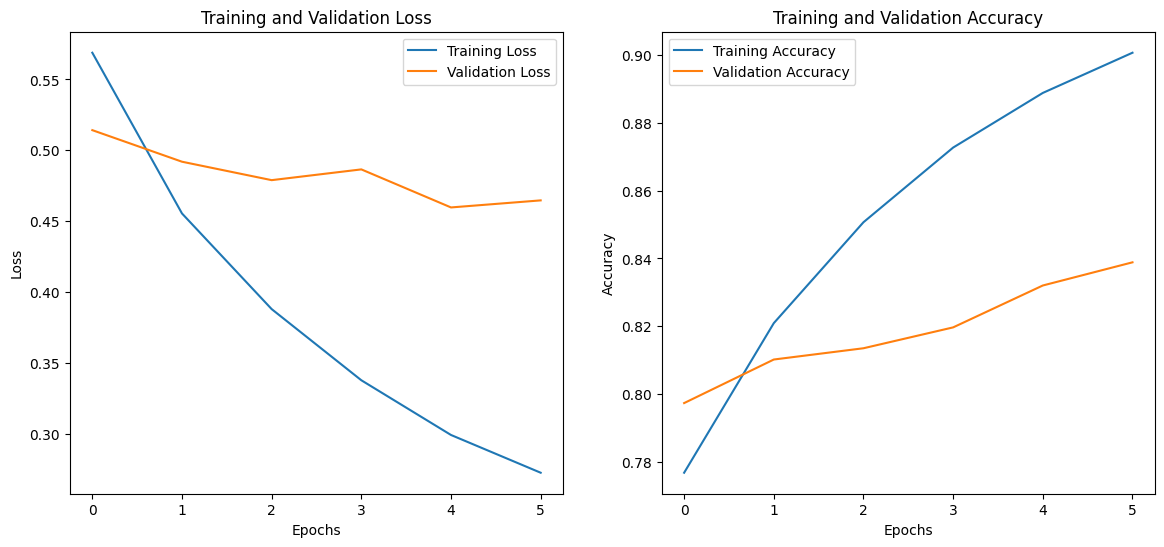

In [27]:
# Plotting the training loss and accuracy
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluating the LSTM model

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Making predictions
y_pred_probs = model.predict(x_test, batch_size=32)
y_pred = np.argmax(y_pred_probs, axis=1)

# Getting true labels
y_true = np.argmax(y_test, axis=1)

# Defining class labels
class_names = ['Neutral', 'Negative', 'Positive']

# Computing confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9197
           1       0.78      0.63      0.70      5088
           2       0.94      0.96      0.95     28457

    accuracy                           0.91     42742
   macro avg       0.86      0.82      0.84     42742
weighted avg       0.90      0.91      0.90     42742



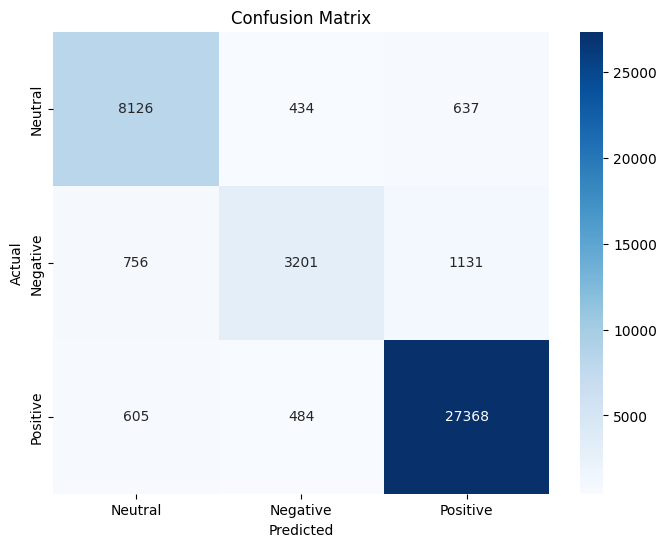

In [39]:
import seaborn as sns

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

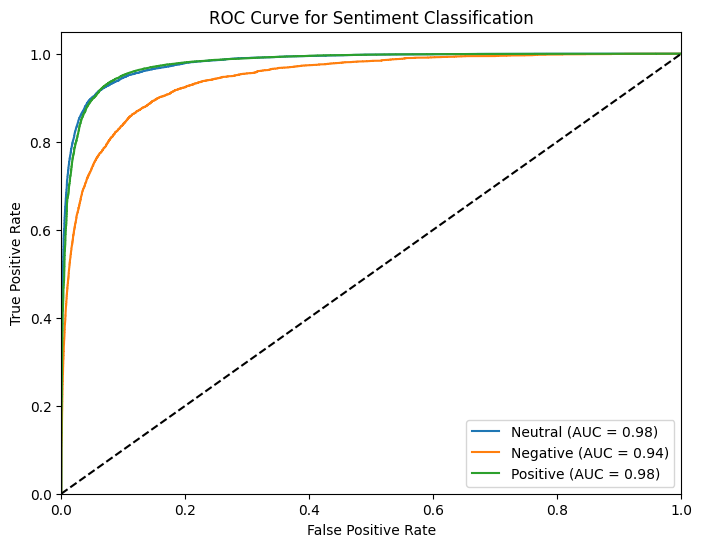

Micro-average AUC: 0.98
Macro-average AUC: 0.97


In [41]:
from sklearn.preprocessing import label_binarize

# Binarize the true labels and predictions for ROC curve
y_true_binarized = label_binarize(y_true, classes=range(len(class_names)))
y_pred_binarized = y_pred_probs

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Classification')
plt.legend(loc="lower right")
plt.show()

# AUC Score
from sklearn.metrics import roc_auc_score
print(f"Micro-average AUC: {roc_auc_score(y_true_binarized, y_pred_binarized, average='micro'):.2f}")
print(f"Macro-average AUC: {roc_auc_score(y_true_binarized, y_pred_binarized, average='macro'):.2f}")